In [1]:
#rotate with angle

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
%matplotlib inline
os.getcwd(),os.listdir()


('C:\\Users\\kochallibrhm\\Desktop\\Ders\\Görüntü İşleme\\week_08',
 ['.ipynb_checkpoints',
  'kordon.jpg',
  'penguins.jfif',
  'README.MD',
  'week8.ipynb'])

In [3]:
def diplay_two_image(img1, img2):
    
    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    
    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    
    plt.show
    
def rotate_by_ij_swap(img1):
    
    m, n, k = img1.shape
    
    new_img = np.zeros((n, m, k), dtype='uint8')
    
    for i in range(m):
        for j in range(n):
            temp = img1[i, j]
            new_img[j, i] = temp
            
    return new_img

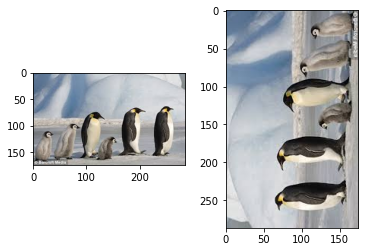

In [50]:
img1 = plt.imread('penguins.jfif')
img2 = rotate_by_ij_swap(img1)
diplay_two_image(img1, img2)

In [51]:
def rotate_with_theta_counterclockwise(point, angle):
    
    theta = np.radians(angle)
    
    r = np.array((  (np.cos(theta), -np.sin(theta)), 
                 (np.sin(theta), np.cos(theta)) ))
    
    v = np.array(point)
    
    return r.dot(v).astype(int)

def get_all_new_locations(img1, angle):
    m, n, k = img1.shape
    new_location_points = []
    for i in range(m):
        for j in range(n):
            new_location_points.append(rotate_with_theta_counterclockwise([i, j], angle))
    
    return new_location_points

def get_min_max(new_location_points):
    minX, minY = new_location_points[0][0], new_location_points[0][1]
    maxX, maxY = new_location_points[0][0], new_location_points[0][1]
    
    s1 = len(new_location_points)
    for s in range(s1):
        
        if minX > new_location_points[s][0]:
                minX = new_location_points[s][0]
            
        if maxX < new_location_points[s][0]:
                maxX = new_location_points[s][0]
        
        if minY > new_location_points[s][1]:
                minY = new_location_points[s][1]
            
        if maxY < new_location_points[s][1]:
                maxY = new_location_points[s][1]
            
        return minX, minY, maxX, maxY
        

In [98]:
new_location_points = get_all_new_locations(img1, 116)
minX, minY, maxX, maxY = get_min_max(new_location_points)
rotate_with_theta_counterclockwise([0, 1], 90)


array([-1,  0])

In [91]:
rotate_with_theta_counterclockwise([0, 0], 116)

array([0, 0])

In [94]:
def rotate_an_image(image1, angle):
    m, n, k = image1.shape
    new_location_points = get_all_new_locations(img1, angle)
    
    minX, minY, maxX, maxY = get_min_max(new_location_points)
    
    newM = maxX - minX + 1
    newN = maxY - minY + 1
    
    xOffset = 0 - minX
    yOffset = 0 - minY
    
    new_image_2 = np.zeros((newM, newN, 3), dtype = 'uint8')
    
    for i in range(m):
        for j in range(n):
            new_i, new_j = rotate_with_theta_counterclockwise([i, j], angle)
            new_image_2[new_i + xOffset, new_j + yOffset] = img1[i, j]
            
    return new_image_2

In [ ]:
i1 = rotate_an_image(img2, 116)
plt.imshow(i1)
plt.show